In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets/Link1/employee.csv")

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>,
        <Axes: title={'center': 'number_project'}>],
       [<Axes: title={'center': 'average_montly_hours'}>,
        <Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'promotion_last_5years'}>,
        <Axes: title={'center': 'left'}>, <Axes: >]], dtype=object)

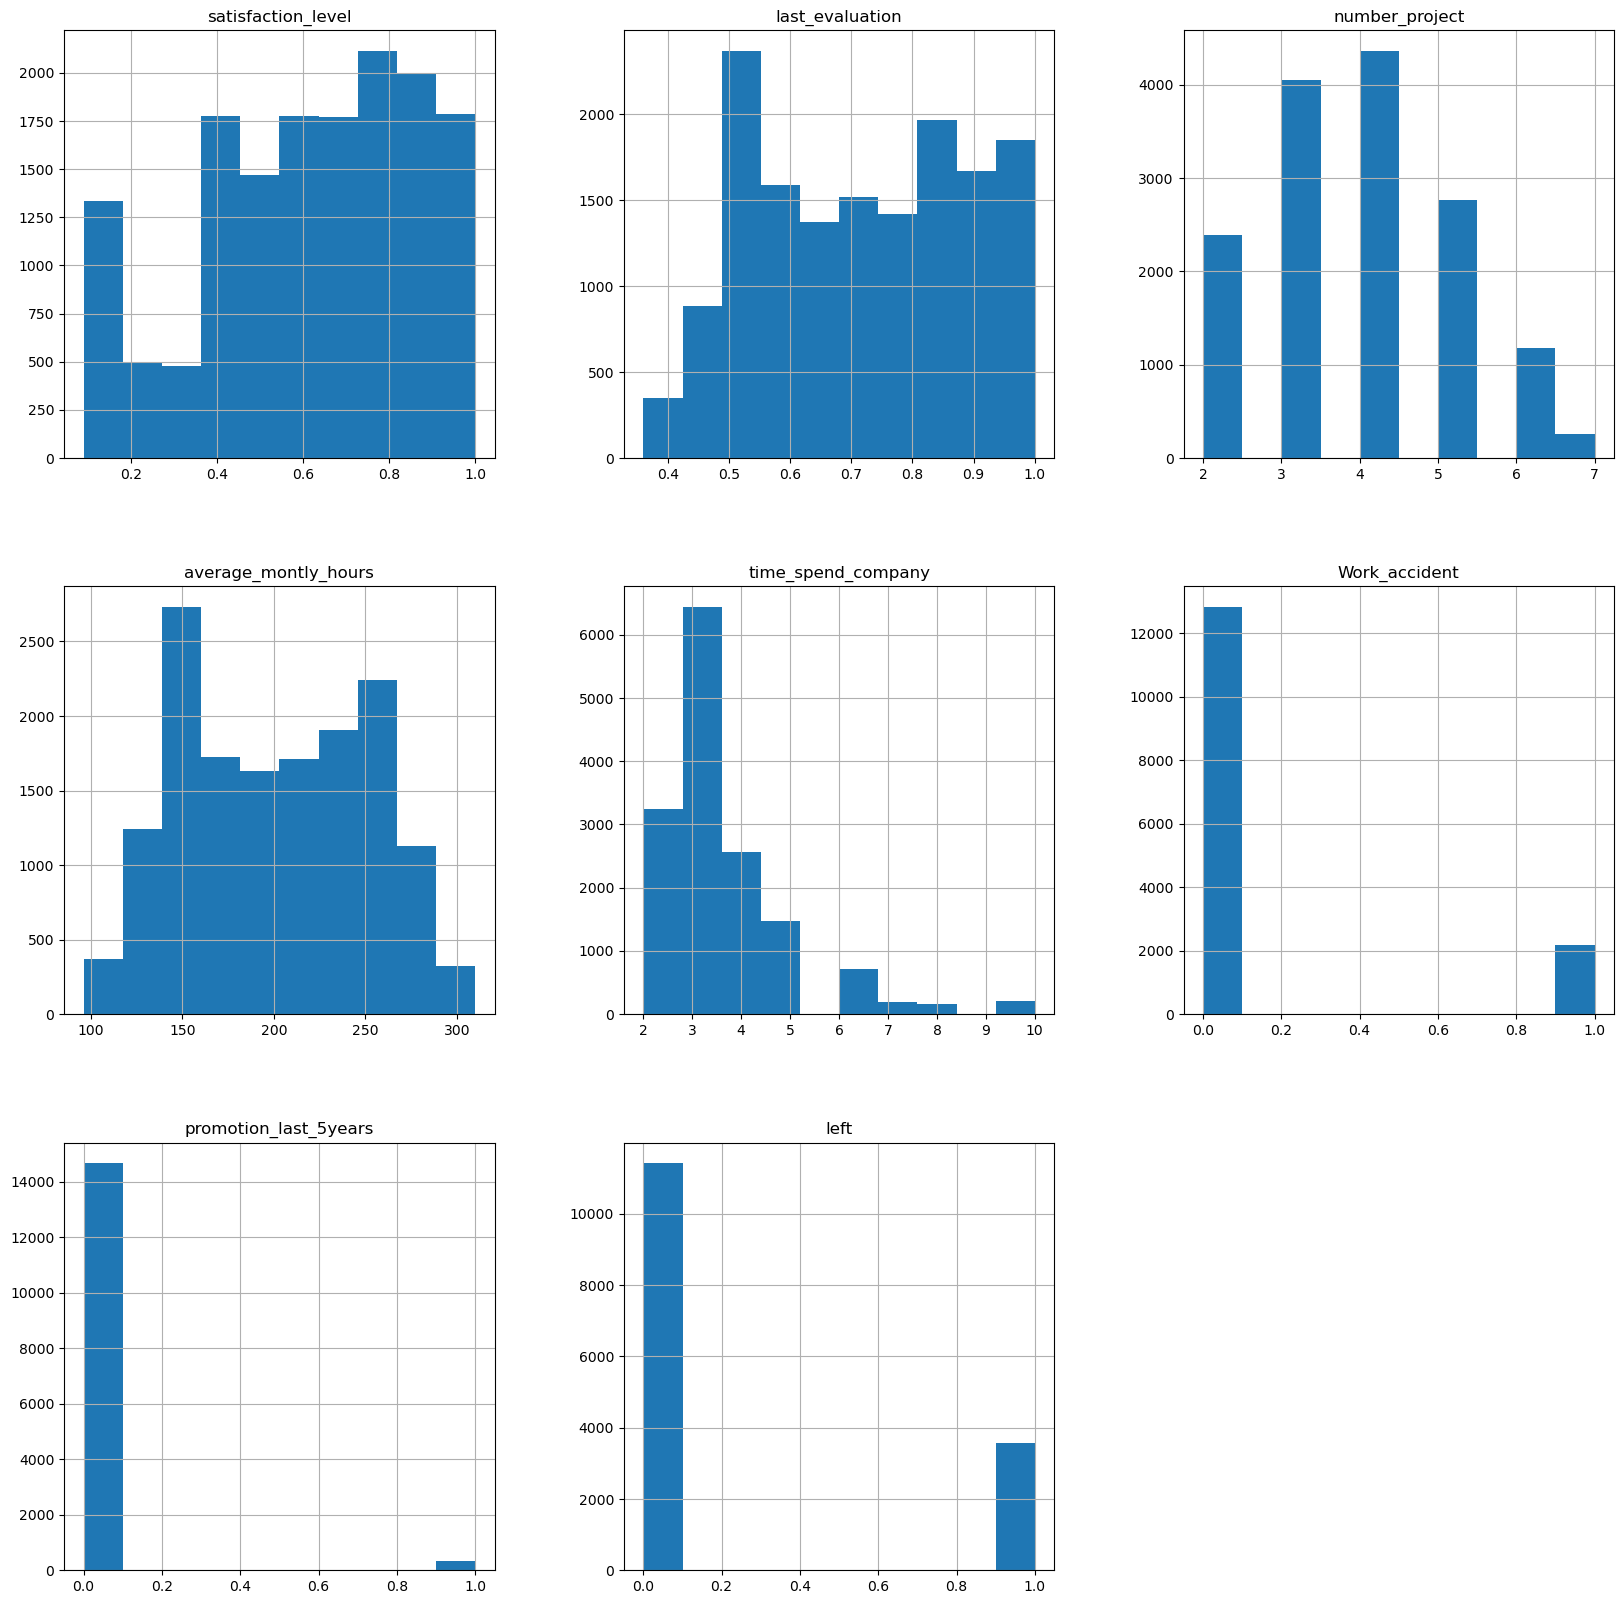

In [4]:
df.hist(figsize=(20,20))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [7]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [9]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [8]:
X = df.drop(["satisfaction_level"],axis = 1)
X

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.53,2,157,3,0,0,sales,low,1
1,0.86,5,262,6,0,0,sales,medium,1
2,0.88,7,272,4,0,0,sales,medium,1
3,0.87,5,223,5,0,0,sales,low,1
4,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...
14994,0.57,2,151,3,0,0,support,low,1
14995,0.48,2,160,3,0,0,support,low,1
14996,0.53,2,143,3,0,0,support,low,1
14997,0.96,6,280,4,0,0,support,low,1


In [10]:
y = df['satisfaction_level'].values
y = y.reshape(-1,1)

In [11]:
y

array([[0.38],
       [0.8 ],
       [0.11],
       ...,
       [0.37],
       [0.11],
       [0.37]])

In [12]:
categ = ['department','salary']
for feat in categ:
    dummy = pd.get_dummies(X[feat],drop_first = True)
    X.drop([feat],axis =1,inplace = True)
    X = pd.concat([X,dummy],axis = 1)
X

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.57,2,151,3,0,0,1,0,0,0,0,0,0,0,1,0,1,0
14995,0.48,2,160,3,0,0,1,0,0,0,0,0,0,0,1,0,1,0
14996,0.53,2,143,3,0,0,1,0,0,0,0,0,0,0,1,0,1,0
14997,0.96,6,280,4,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
X_train.isnull().sum()

last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
left                     0
RandD                    0
accounting               0
hr                       0
management               0
marketing                0
product_mng              0
sales                    0
support                  0
technical                0
low                      0
medium                   0
dtype: int64

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [15]:
reg.score(X_test,y_test)

0.19863041431635686

## Polynomial Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
polyreg = LinearRegression()
polyreg.fit(X_poly_train,y_train)

LinearRegression()

In [25]:
polyreg.score(X_poly_test,y_test)

0.35607358799664734

## Support Vector Machines

In [18]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

C:\Users\joben\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [19]:
svr.score(X_test,y_test)

0.16529252301258213

## Decision Tree Regressor

In [20]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [21]:
dtr.score(X_test,y_test)

0.19062585646340946

## Lasso-Ridge Regressor

In [22]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha = 10)
ridgeR.fit(X_train,y_train)

Ridge(alpha=10)

In [23]:
ridgeR.score(X_test,y_test)

0.19861654837642806